In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holtt

In [2]:
covid = pd.read_csv('covid_19_data.csv')

In [3]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


In [5]:
print('Size/shape of the dataset', covid.shape)

Size/shape of the dataset (18327, 8)


In [6]:
print('Checking for null values', covid.isnull().sum())

Checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [7]:
print('Checking Data - Type', covid.dtypes)

Checking Data - Type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


# Dropping the Columss

In [8]:
covid.drop(['SNo'], axis=1,inplace=True)

In [9]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 7 columns):
ObservationDate    18327 non-null object
Province/State     9050 non-null object
Country/Region     18327 non-null object
Last Update        18327 non-null object
Confirmed          18327 non-null float64
Deaths             18327 non-null float64
Recovered          18327 non-null float64
dtypes: float64(3), object(4)
memory usage: 1002.3+ KB


In [11]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])

In [12]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 7 columns):
ObservationDate    18327 non-null datetime64[ns]
Province/State     9050 non-null object
Country/Region     18327 non-null object
Last Update        18327 non-null object
Confirmed          18327 non-null float64
Deaths             18327 non-null float64
Recovered          18327 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1002.3+ KB


In [13]:
covid['ObservationDate'].head()

0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: ObservationDate, dtype: datetime64[ns]

# Grouping different types of cases as per the date

In [14]:
datewise = covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [24]:
datewise.tail(1)

,Confirmed,Recovered,Deaths,WeekofYear
ObservationDate,,,,
2020-04-24,2811193.0,793601.0,197159.0,17


In [16]:
print('Basic information')
print('Total number of confirmed cases around the world',datewise['Confirmed'].iloc[-1])
print('Total number of Recovered cases around the world',datewise['Recovered'].iloc[-1])
print('Total number of Deaths cases around the world',datewise['Deaths'].iloc[-1])
print('Total number of Active cases around the world',(datewise['Confirmed'].iloc[-1] - datewise['Recovered'].iloc[-1] - datewise['Deaths'].iloc[-1]))
print('Total number of Closed cases around the world',(datewise['Recovered'].iloc[-1] + datewise['Deaths'].iloc[-1]))

Basic information
Total number of confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Deaths cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

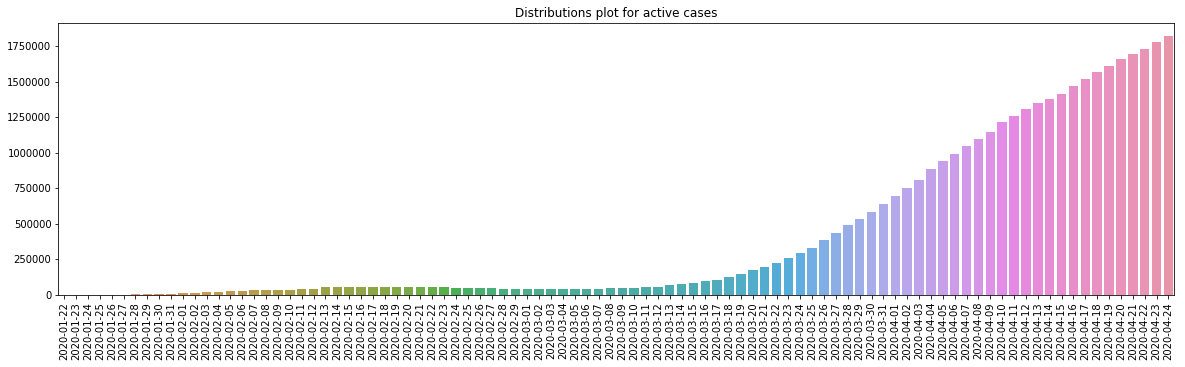

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date, y=datewise['Confirmed']- datewise['Recovered'] - datewise['Deaths'])
plt.title('Distributions plot for active cases')
plt.xticks(rotation=90)

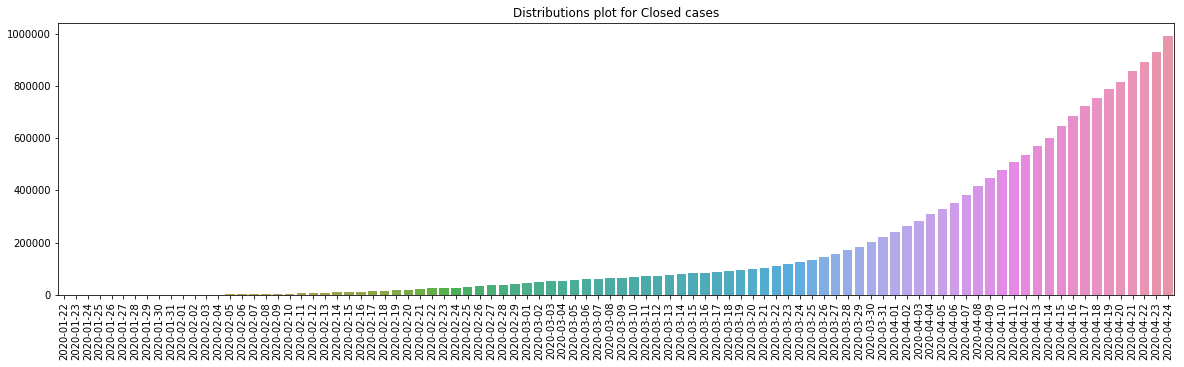

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date, y=datewise['Recovered']+ datewise['Deaths'])
plt.title('Distributions plot for Closed cases')
plt.xticks(rotation=90)
plt.show()

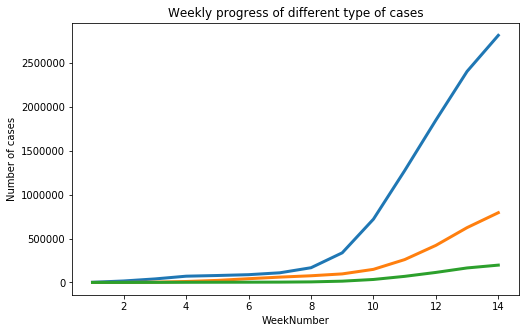

In [26]:
datewise['WeekofYear'] = datewise.index.weekofyear
week_num =[]
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise['WeekofYear'].unique()):
    weekwise_confirmed.append(datewise[datewise['WeekofYear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['WeekofYear']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['WeekofYear']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel('WeekNumber')
plt.ylabel('Number of cases')
plt.title('Weekly progress of different type of cases')
plt.show()

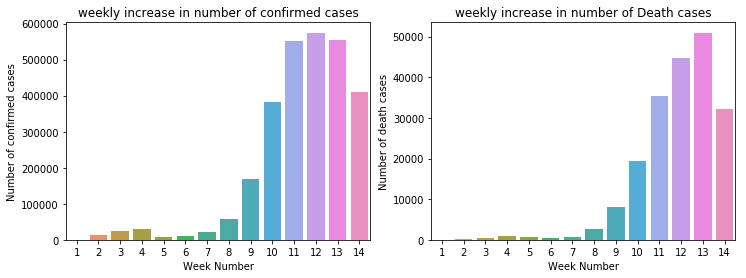

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax1.set_ylabel('Number of confirmed cases')
ax2.set_ylabel('Number of death cases')
ax1.set_title('weekly increase in number of confirmed cases')
ax2.set_title('weekly increase in number of Death cases')
plt.show()

Average increase in number of confirmed cases everyday: 29900.0
Average increase in number of recovered cases everyday: 8442.0
Average increase in number of death cases everyday: 2097.0


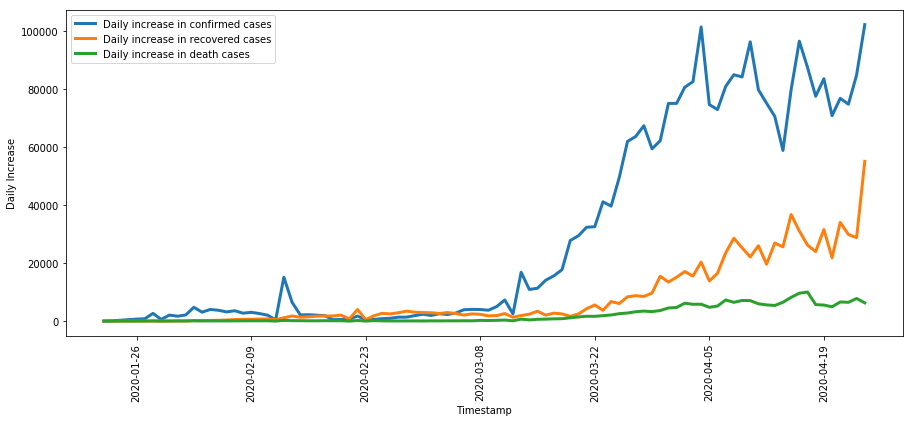

In [30]:
import numpy as np
print('Average increase in number of confirmed cases everyday:', np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print('Average increase in number of recovered cases everyday:', np.round(datewise['Recovered'].diff().fillna(0).mean()))
print('Average increase in number of death cases everyday:', np.round(datewise['Deaths'].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise['Confirmed'].diff().fillna(0),label='Daily increase in confirmed cases',linewidth=3)
plt.plot(datewise['Recovered'].diff().fillna(0),label='Daily increase in recovered cases',linewidth=3)
plt.plot(datewise['Deaths'].diff().fillna(0),label='Daily increase in death cases',linewidth=3)
plt.xlabel('Timestamp')
plt.ylabel('Daily Increase')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [31]:
covid.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [34]:
countrywise = covid[covid['ObservationDate'] == covid['ObservationDate'].max()].groupby(['Country/Region']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'}).sort_values(['Confirmed'],ascending=False)

In [35]:
countrywise['Mortality'] = (countrywise['Deaths']/countrywise['Confirmed'])*100

In [36]:
countrywise['Recovered'] = (countrywise['Recovered']/countrywise['Confirmed'])*100

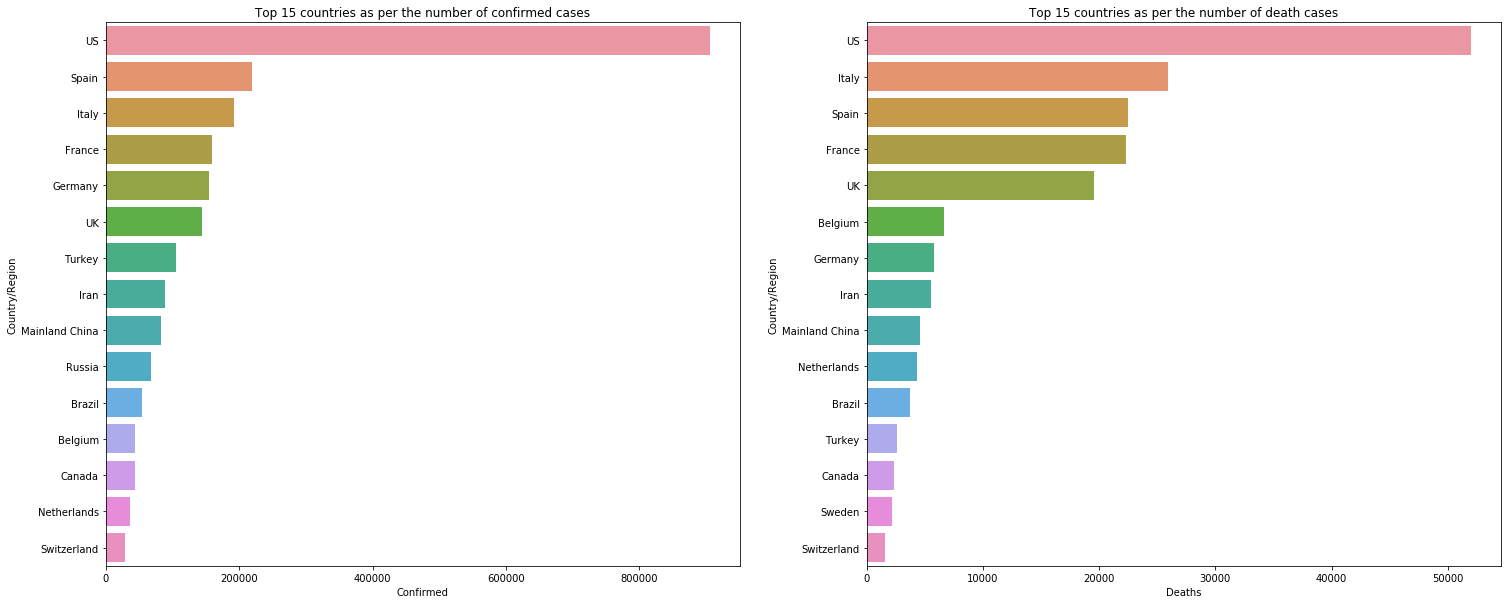

In [37]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(['Confirmed'],ascending = False).head(15)
top_15deaths = countrywise.sort_values(['Deaths'],ascending = False).head(15)
sns.barplot(x=top_15confirmed['Confirmed'],y=top_15confirmed.index,ax=ax1)
ax1.set_title('Top 15 countries as per the number of confirmed cases')
sns.barplot(x=top_15deaths['Deaths'],y=top_15deaths.index,ax=ax2)
ax2.set_title('Top 15 countries as per the number of death cases')
plt.show()

In [38]:
covid.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [41]:
india_data = covid[covid['Country/Region'] == 'India']
datewise_india = india_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print("Total Acive cases",datewise_india['Confirmed'].iloc[-1] -datewise_india['Recovered'].iloc[-1] - datewise_india['Deaths'].iloc[-1])
print("Total Closed cases",datewise_india['Recovered'].iloc[-1] + datewise_india['Deaths'].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Acive cases 18252.0
Total Closed cases 6278.0


In [42]:
us_data = covid[covid['Country/Region'] == 'US']
datewise_us = us_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print(datewise_us.iloc[-1])
print("Total Acive cases",datewise_us['Confirmed'].iloc[-1] -datewise_us['Recovered'].iloc[-1] - datewise_us['Deaths'].iloc[-1])
print("Total Closed cases",datewise_us['Recovered'].iloc[-1] + datewise_us['Deaths'].iloc[-1])

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Acive cases 754305.0
Total Closed cases 151028.0


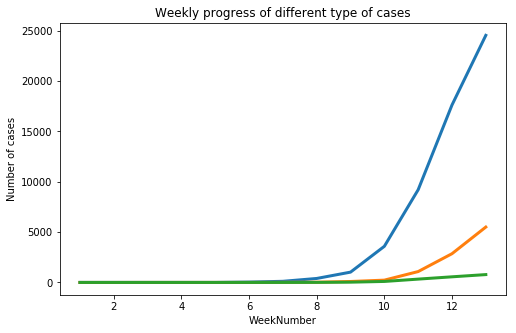

In [43]:
datewise_india['WeekofYear'] = datewise_india.index.weekofyear
week_num_india =[]
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india['WeekofYear'].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india['WeekofYear']==i]['Confirmed'].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india['WeekofYear']==i]['Recovered'].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india['WeekofYear']==i]['Deaths'].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3)
plt.xlabel('WeekNumber')
plt.ylabel('Number of cases')
plt.title('Weekly progress of different type of cases')
plt.show()

In [46]:
max_ind = datewise_india['Confirmed'].max()
china_data = covid[covid['Country/Region'] == 'Mainland China']
Italy_data = covid[covid['Country/Region'] == 'Italy']
us_data = covid[covid['Country/Region'] == 'US']
spain_data = covid[covid['Country/Region'] == 'Spain']
datewise_china = china_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_Italy = Italy_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_us = us_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise_spain = spain_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
print('It took', datewise_india[datewise_india['Confirmed']>0].shape[0],'days in India to reach', max_ind,'Confirmed Cases')
print('It took', datewise_Italy[(datewise_Italy['Confirmed']>0) & (datewise_Italy['Confirmed']<= max_ind)].shape[0],'days in Italy to reach number of Confirmed Cases')
print('It took', datewise_us[(datewise_us['Confirmed']>0) & (datewise_us['Confirmed']<= max_ind)].shape[0],'days in us to reach number of Confirmed Cases')
print('It took', datewise_spain[(datewise_spain['Confirmed']>0) & (datewise_spain['Confirmed']<= max_ind)].shape[0],'days in spain to reach number of Confirmed Cases')
print('It took', datewise_china[(datewise_china['Confirmed']>0) & (datewise_china['Confirmed']<= max_ind)].shape[0],'days in china to reach number of Confirmed Cases')


It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in Italy to reach number of Confirmed Cases
It took 59 days in us to reach number of Confirmed Cases
It took 49 days in spain to reach number of Confirmed Cases
It took 14 days in china to reach number of Confirmed Cases


In [ ]:
datewise['Days since'] = datewise.index - datewise.index[0]
datewise['Days since'] = datewise['Days since']